In [63]:
import pandas as pd
import numpy as np

In [64]:
df = pd.read_csv('final_complete_dataset.csv', encoding='latin1')  # or encoding='ISO-8859-1'
df.sample(5)

,Transcript,labels
26998,'I am your taxi service assistant. I can help ...,1
20651,Then why you came to hostel.,0
8111,"'Hello, this is the customer service center of...",1
12629,"'Hello, this is the customer service center of...",1
16102,"Hello, is this the IT department? Ah, yeah! Th...",0


In [65]:
df.shape

(45939, 2)

# Process
1. Data cleaning 
2. EDA
3. Text Preprocessing
4. Model Building 
5. Evaluation
6. Improvements
7. Website
8. Deploy

In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45939 entries, 0 to 45938
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Transcript  45939 non-null  object
 1   labels      45939 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 717.9+ KB


Drop last 3 columns

In [67]:
df.sample(5)

,Transcript,labels
25943,'Customer service representatives are at your ...,1
28029,"I am Investigator , a high-tech criminal inves...",1
44472,"Hey, Iâm calling to discuss the book swap ev...",0
3365,What was your first part-time job? During my m...,0
36154,"'Hey, is it Mr. Li? I am the son of your neigh...",1


In [68]:
# missing values
df.isna().sum()

Transcript    0
labels        0
dtype: int64

In [69]:
# check for duplicates
print(df.duplicated().sum())
df.duplicated().sum()
df = df.drop_duplicates(keep='first')

9443


In [70]:
df.shape

(36496, 2)

# EDA

In [71]:
df.head()

,Transcript,labels
0,"'Hello, this is the customer service center of...",1
1,"'Hello, I am from the risk control department ...",1
2,"'Hello, this is SF Express customer service. W...",1
3,"'Hey, sir, I am Officer Zhang, very urgent, yo...",1
4,"'Hello, this is the XX Express Customer Servic...",1


In [72]:
df['labels'].value_counts()

labels
1    23916
0    12580
Name: count, dtype: int64

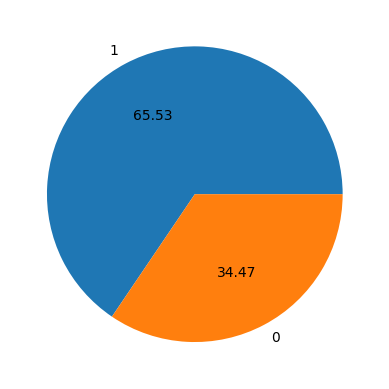

In [73]:
import matplotlib.pyplot as plt
plt.pie(df['labels'].value_counts(), labels=[1,0], autopct="%0.2f")
plt.show()

In [74]:
# Data is imbalanced

In [75]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\irbag\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [76]:
df.isna().sum()
df = df.dropna()
df.isna().sum()


Transcript    0
labels        0
dtype: int64

In [77]:
# length of each messages, that is no of characters
df['num_characters'] = df['Transcript'].apply(len)

In [78]:
df.head()

,Transcript,labels,num_characters
0,"'Hello, this is the customer service center of...",1,2794
1,"'Hello, I am from the risk control department ...",1,2679
2,"'Hello, this is SF Express customer service. W...",1,2194
3,"'Hey, sir, I am Officer Zhang, very urgent, yo...",1,1033
4,"'Hello, this is the XX Express Customer Servic...",1,351


In [79]:
# num of words 
import nltk
nltk.download('punkt_tab')
df['num_words'] = df['Transcript'].apply(lambda x: len(nltk.word_tokenize(x)))

[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\irbag\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


In [80]:
df.head()

,Transcript,labels,num_characters,num_words
0,"'Hello, this is the customer service center of...",1,2794,579
1,"'Hello, I am from the risk control department ...",1,2679,547
2,"'Hello, this is SF Express customer service. W...",1,2194,474
3,"'Hey, sir, I am Officer Zhang, very urgent, yo...",1,1033,237
4,"'Hello, this is the XX Express Customer Servic...",1,351,77


In [81]:
# num of sentences in the text
df['num_sentences'] = df['Transcript'].apply(lambda x: len(nltk.sent_tokenize(x)))

In [82]:
df.head()

,Transcript,labels,num_characters,num_words,num_sentences
0,"'Hello, this is the customer service center of...",1,2794,579,45
1,"'Hello, I am from the risk control department ...",1,2679,547,32
2,"'Hello, this is SF Express customer service. W...",1,2194,474,35
3,"'Hey, sir, I am Officer Zhang, very urgent, yo...",1,1033,237,19
4,"'Hello, this is the XX Express Customer Servic...",1,351,77,6


In [83]:
df[['num_characters', 'num_words', 'num_sentences']].describe()

,num_characters,num_words,num_sentences
count,36496.000000,36496.000000,36496.000000
mean,1764.321980,385.094860,25.187089
std,2579.035001,576.182158,31.137181
min,2.000000,1.000000,1.000000
25%,293.000000,68.000000,6.000000
50%,1029.500000,226.000000,18.000000
75%,2027.250000,431.000000,32.000000
max,52560.000000,11510.000000,825.000000


In [84]:
# ham message describe
df[df['labels']==0][['num_characters', 'num_words', 'num_sentences']].describe()

,num_characters,num_words,num_sentences
count,12580.000000,12580.000000,12580.000000
mean,2066.168442,465.717568,24.441335
std,3745.357635,846.000741,38.943933
min,2.000000,1.000000,1.000000
25%,61.000000,15.000000,1.000000
50%,170.000000,42.000000,4.000000
75%,1182.000000,264.000000,26.000000
max,15198.000000,3542.000000,247.000000


In [85]:
# spam messages describe
df[df['labels']==1][['num_characters', 'num_words', 'num_sentences']].describe()

,num_characters,num_words,num_sentences
count,23916.000000,23916.000000,23916.000000
mean,1605.548419,342.686695,25.579361
std,1642.780354,353.474158,26.102627
min,13.000000,2.000000,1.000000
25%,666.000000,148.000000,12.000000
50%,1323.000000,285.000000,22.000000
75%,2113.000000,449.000000,33.000000
max,52560.000000,11510.000000,825.000000


<Axes: xlabel='num_words', ylabel='Count'>

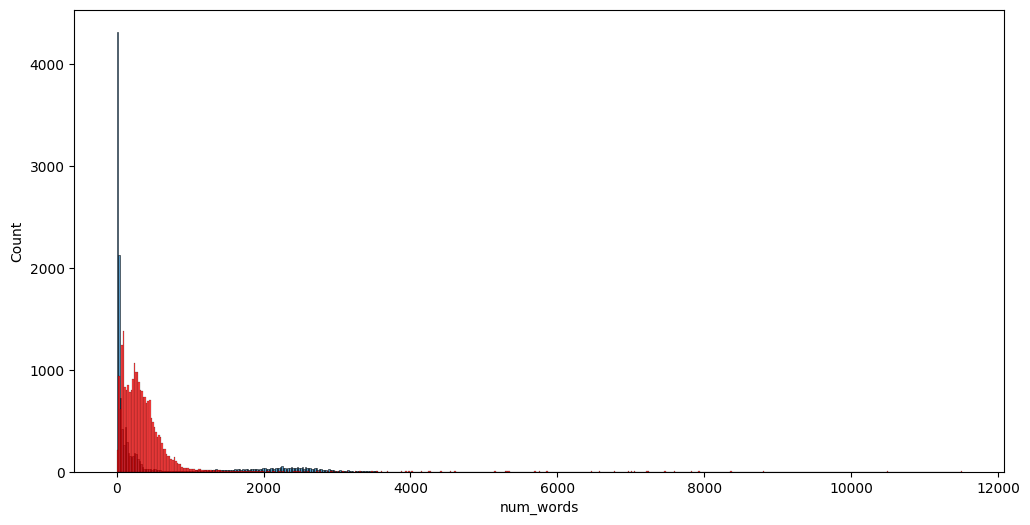

In [86]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(12,6))
sns.histplot(df[df['labels']==0]['num_words'])
sns.histplot(df[df['labels']==1]['num_words'], color='red')

<Axes: xlabel='num_characters', ylabel='Count'>

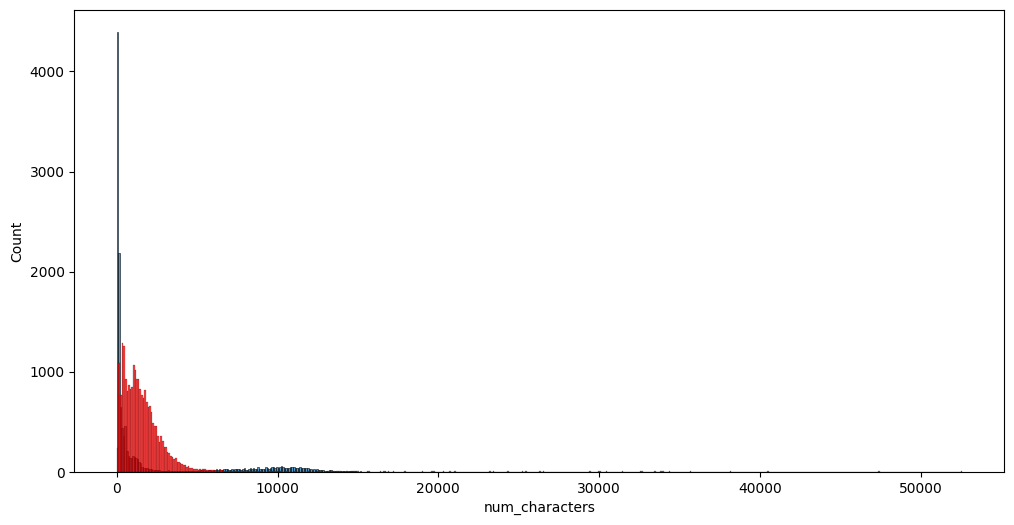

In [87]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['labels']==0]['num_characters'])
sns.histplot(df[df['labels']==1]['num_characters'], color='red')

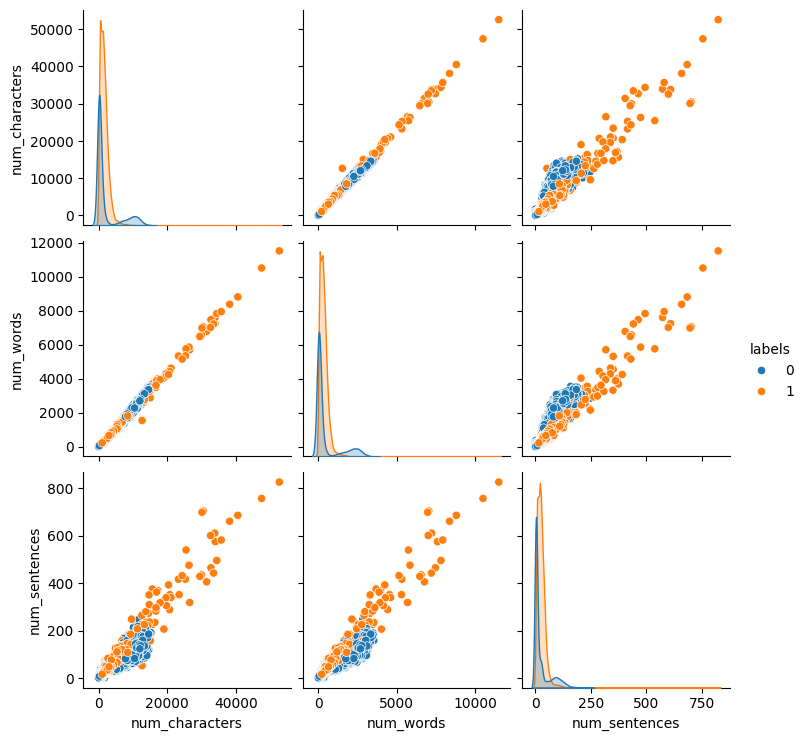

In [88]:
sns.pairplot(df, hue='labels')

<Axes: >

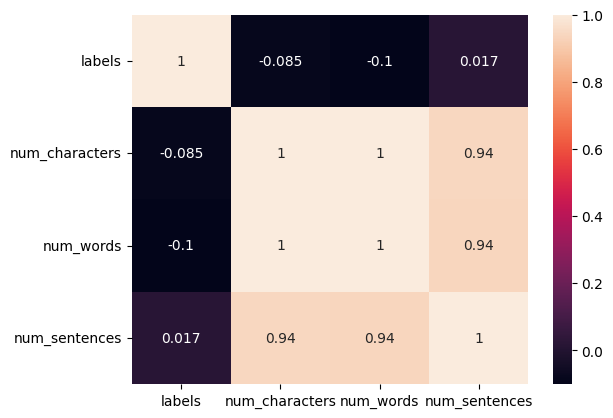

In [89]:
sns.heatmap(df.select_dtypes(include='number').corr(), annot=True)

# 3. Data Preprocessing

1. Lowercase
2. Tokenization
3. Removing Special Characters
4. Removing Stop words and Punctuations
5. Stemming

In [90]:
# removing 3 part 
from nltk.corpus import stopwords
stopwords.words('english')

# removing 4 part 
import string
string.punctuation

# removing 5 part 
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
ps.stem("loving")

'love'

In [91]:
# Not Efficient code
# def transform_text(text):
#   text = text.lower()
#   text = nltk.word_tokenize(text)

#   y = []
#   for i in text:
#     if i.isalnum():
#       y.append(i)

#   text = y[:]
#   y.clear()

#   for i in text:
#     if i not in stopwords.words("english") and i not in string.punctuation:
#       y.append(i)
    
#   text = y[:]
#   y.clear()

#   for i in text:
#     y.append(ps.stem(i))

#   return " ".join(y)

In [92]:
# Efficient Code for doing the same Operations
import re
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import string

ps = PorterStemmer()
stopwords_set = set(stopwords.words("english"))

def transform_text(text):
    # Lowercase and tokenize in one step using regex (faster)
    tokens = re.findall(r'\b\w+\b', text.lower())

    # Remove stopwords and punctuation, and apply stemming
    filtered = [ps.stem(word) for word in tokens if word not in stopwords_set]

    return " ".join(filtered)


In [93]:
transform_text("/Hello, world! This /is a test: can you read @this_text? Its full of #symbols, *stars*, &ampersands&, ^carets^, and (parentheses)...")

'hello world test read this_text full symbol star ampersand caret parenthes'

In [94]:
# now applying the transformation to our entire text
df['transformed_text'] = df['Transcript'].apply(transform_text)

In [95]:
df.head(1)

,Transcript,labels,num_characters,num_words,num_sentences,transformed_text
0,"'Hello, this is the customer service center of...",1,2794,579,45,hello custom servic center certain bank xiao l...


In [96]:
# mostly used  words
from wordcloud import WordCloud
wc = WordCloud(width=500, height=500, min_font_size=10, background_color='white')

In [97]:
df

,Transcript,labels,num_characters,num_words,num_sentences,transformed_text
0,"'Hello, this is the customer service center of...",1,2794,579,45,hello custom servic center certain bank xiao l...
1,"'Hello, I am from the risk control department ...",1,2679,547,32,hello risk control depart certain bank monitor...
2,"'Hello, this is SF Express customer service. W...",1,2194,474,35,hello sf express custom servic found sum cash ...
3,"'Hey, sir, I am Officer Zhang, very urgent, yo...",1,1033,237,19,hey sir offic zhang urgent famili danger situa...
4,"'Hello, this is the XX Express Customer Servic...",1,351,77,6,hello xx express custom servic center found pa...
...,...,...,...,...,...,...
45931,What can't be cured must be endured.,0,36,9,1,cure must endur
45932,'Welcome to consult the customer service cente...,1,2509,484,34,welcom consult custom servic center custom ser...
45934,"'Hello, I am Director Li from an international...",1,3022,649,47,hello director li intern invest compani recent...
45937,"Yes, my successor, are you going to smoke? Tha...",0,262,61,8,ye successor go smoke non smoke book go withou...


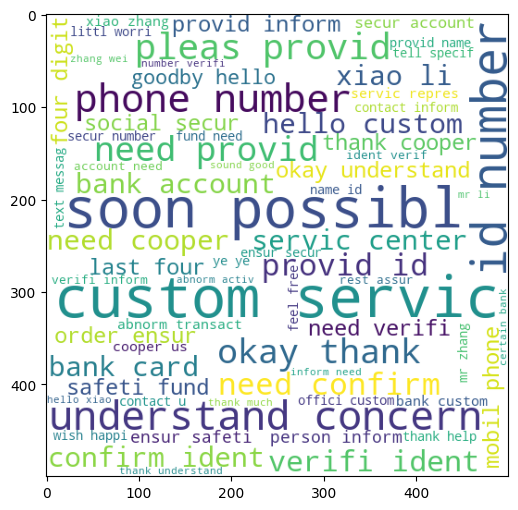

In [98]:
# mostly used spam words 
spam_wc = wc.generate(df[df['labels']==1]['transformed_text'].str.cat(sep=" "))
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)

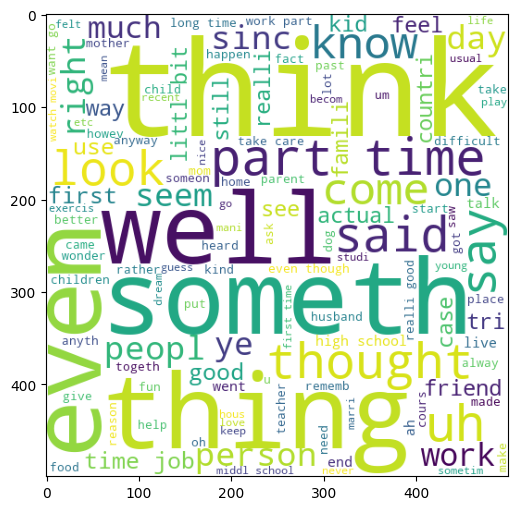

In [99]:
# mostly used ham words (non spam)
ham_wc = wc.generate(df[df['labels']==0]['transformed_text'].str.cat(sep=" "))
plt.figure(figsize=(15,6))
plt.imshow(ham_wc)

In [100]:
df.head()

,Transcript,labels,num_characters,num_words,num_sentences,transformed_text
0,"'Hello, this is the customer service center of...",1,2794,579,45,hello custom servic center certain bank xiao l...
1,"'Hello, I am from the risk control department ...",1,2679,547,32,hello risk control depart certain bank monitor...
2,"'Hello, this is SF Express customer service. W...",1,2194,474,35,hello sf express custom servic found sum cash ...
3,"'Hey, sir, I am Officer Zhang, very urgent, yo...",1,1033,237,19,hey sir offic zhang urgent famili danger situa...
4,"'Hello, this is the XX Express Customer Servic...",1,351,77,6,hello xx express custom servic center found pa...


In [101]:
# spam top 30 words
spam_corpus = []
for msg in df[df['labels']==1]['transformed_text'].tolist():
  for word in msg.split():
    spam_corpus.append(word)
  

In [102]:
len(spam_corpus)

3308030

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29],
 [Text(0, 0, 'need'),
  Text(1, 0, 'number'),
  Text(2, 0, 'inform'),
  Text(3, 0, 'okay'),
  Text(4, 0, 'account'),
  Text(5, 0, 'provid'),
  Text(6, 0, 'pleas'),
  Text(7, 0, 'hello'),
  Text(8, 0, 'servic'),
  Text(9, 0, 'bank'),
  Text(10, 0, 'thank'),
  Text(11, 0, 'understand'),
  Text(12, 0, 'custom'),
  Text(13, 0, 'confirm'),
  Text(14, 0, 'time'),
  Text(15, 0, 'contact'),
  Text(16, 0, 'first'),
  Text(17, 0, 'possibl'),
  Text(18, 0, 'soon'),
  Text(19, 0, 'tell'),
  Text(20, 0, 'order'),
  Text(21, 0, 'secur'),
  Text(22, 0, 'verifi'),
  Text(23, 0, 'phone'),
  Text(24, 0, 'help'),
  Text(25, 0, 'id'),
  Text(26, 0, 'call'),
  Text(27, 0, 'li'),
  Text(28, 0, 'name'),
  Text(29, 0, 'cooper')])

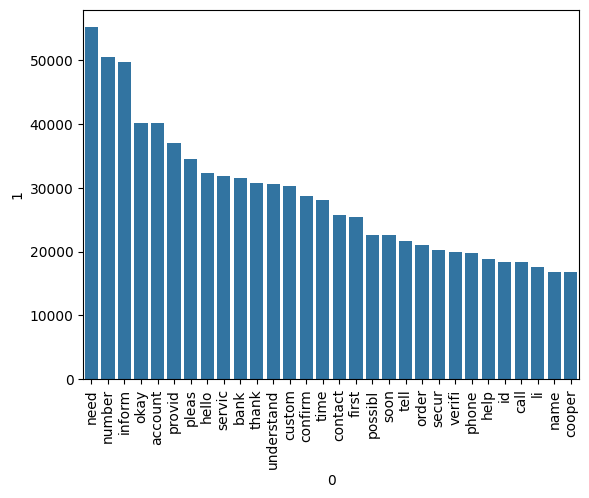

In [103]:
from collections import Counter
sns.barplot(x =pd.DataFrame(Counter(spam_corpus).most_common(30))[0],y= pd.DataFrame(Counter(spam_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29],
 [Text(0, 0, 'like'),
  Text(1, 0, 'think'),
  Text(2, 0, 'time'),
  Text(3, 0, 'go'),
  Text(4, 0, 'realli'),
  Text(5, 0, 'lot'),
  Text(6, 0, 'peopl'),
  Text(7, 0, 'thing'),
  Text(8, 0, 'littl'),
  Text(9, 0, 'want'),
  Text(10, 0, 'good'),
  Text(11, 0, 'day'),
  Text(12, 0, 'get'),
  Text(13, 0, 'also'),
  Text(14, 0, 'would'),
  Text(15, 0, 'well'),
  Text(16, 0, 'someth'),
  Text(17, 0, 'person'),
  Text(18, 0, 'even'),
  Text(19, 0, 'work'),
  Text(20, 0, 'uh'),
  Text(21, 0, 'bit'),
  Text(22, 0, 'eat'),
  Text(23, 0, 'know'),
  Text(24, 0, 'say'),
  Text(25, 0, 'look'),
  Text(26, 0, 'school'),
  Text(27, 0, 'said'),
  Text(28, 0, 'movi'),
  Text(29, 0, 'thought')])

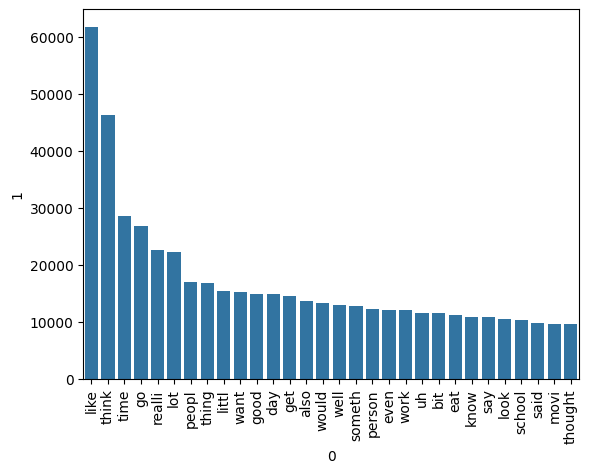

In [104]:
# ham top 30 words
ham_corpus = []
for msg in df[df['labels']==0]['transformed_text'].tolist():
  for word in msg.split():
    ham_corpus.append(word)

len(ham_corpus)

from collections import Counter
sns.barplot(x =pd.DataFrame(Counter(ham_corpus).most_common(30))[0],y= pd.DataFrame(Counter(ham_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')

In [105]:
ham_corpus

['day',
 'cake',
 'call',
 'letter',
 'cake',
 'expens',
 'mani',
 'cake',
 'think',
 'come',
 'birthday',
 'think',
 'would',
 'like',
 'order',
 'least',
 'one',
 'letter',
 'cake',
 'day',
 'peopl',
 'make',
 'mani',
 'common',
 'thing',
 'make',
 'custom',
 'item',
 'start',
 'take',
 'care',
 'lot',
 'thing',
 'probabl',
 'letter',
 'cake',
 'one',
 'kind',
 'cake',
 'becom',
 'popular',
 'even',
 'though',
 'letter',
 'cake',
 'actual',
 'simpl',
 'letter',
 'written',
 'mani',
 'expens',
 'know',
 '40',
 '000',
 '100',
 '000',
 'look',
 'order',
 'money',
 'birthday',
 'said',
 'rang',
 '40',
 '000',
 '100',
 '000',
 'cours',
 'price',
 'bit',
 'high',
 'also',
 'eat',
 'big',
 'also',
 'cake',
 'origin',
 'someth',
 'absolut',
 'necessari',
 'prepar',
 'birthday',
 'anniversari',
 'basic',
 'price',
 'becom',
 'high',
 'think',
 'situat',
 'peopl',
 'may',
 'give',
 'becom',
 'neglig',
 'birthday',
 'anniversari',
 'ever',
 'thought',
 'see',
 'order',
 'letter',
 'cake',
 'ins

In [106]:
# 1  Select the two columns and rename transformed_text → Transcript
final_df = (
    df[['transformed_text', 'labels']]          # keep only the two columns
    .rename(columns={'transformed_text': 'Transcript'})
)

# 2  Save to disk without the automatic index column
final_df.to_csv('preprocessed_final_data.csv', index=False)


# Model Building

In [107]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)

In [108]:
# X =cv.fit_transform(df['transformed_text']).toarray()
X =tfidf.fit_transform(final_df['Transcript']).toarray()

In [109]:
X.shape

(36496, 3000)

In [110]:
y = final_df['labels'].values

In [111]:
from sklearn.model_selection import train_test_split

In [112]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=2)

In [113]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score, precision_score, confusion_matrix

In [114]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [115]:
gnb.fit(X_train, y_train)
y_predict1 = gnb.predict(X_test)
print(accuracy_score(y_test, y_predict1))
print(precision_score(y_test, y_predict1))
print(confusion_matrix(y_test, y_predict1))

0.9343835616438356
0.9254559873116575
[[2153  376]
 [ 103 4668]]


In [116]:
mnb.fit(X_train, y_train)
y_predict2 = mnb.predict(X_test)
print(accuracy_score(y_test, y_predict2))
print(precision_score(y_test, y_predict2))
print(confusion_matrix(y_test, y_predict2))

0.9493150684931507
0.9493567490300184
[[2281  248]
 [ 122 4649]]


In [117]:
bnb.fit(X_train, y_train)
y_predict3 = bnb.predict(X_test)
print(accuracy_score(y_test, y_predict3))
print(precision_score(y_test, y_predict3))
print(confusion_matrix(y_test, y_predict3))

0.9346575342465754
0.9857466063348417
[[2466   63]
 [ 414 4357]]


In [118]:
# using tfidf we used it.
# tfidf --> MNB

In [119]:
# using various Models
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, BaggingClassifier, ExtraTreesClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier

In [120]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc  = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)


In [121]:
clfs = {
    'SVC'      : svc,
    'KN'       : knc,
    'NB'       : mnb,
    'DT'       : dtc,
    'LR'       : lrc,
    'RF'       : rfc,
    'AdaBoost' : abc,
    'BgC'      : bc,
    'ETC'      : etc,
    'GBDT'     : gbdt,
    'xgb'      : xgb
}


In [122]:
from sklearn.metrics import classification_report

def train_classifier(clf, X_train, y_train, X_test, y_test):
  clf.fit(X_train,y_train)
  y_pred = clf.predict(X_test)
  print(classification_report(y_test, y_pred, target_names=["Not Scam", "Scam"]))
  accuracy = accuracy_score( y_test, y_pred)
  precision = precision_score( y_test, y_pred)
  return accuracy,precision

In [123]:
# example
train_classifier(svc, X_train=X_train ,y_train=y_train, X_test=X_test, y_test=y_test)

              precision    recall  f1-score   support

    Not Scam       0.98      0.99      0.98      2529
        Scam       0.99      0.99      0.99      4771

    accuracy                           0.99      7300
   macro avg       0.98      0.99      0.99      7300
weighted avg       0.99      0.99      0.99      7300



(0.9872602739726027, 0.9932517924926192)

In [ ]:
accuracy_scores =[]
precision_scores =[]

for name, clf in clfs.items():
  print("\nFor ", name)
  current_accuracy, current_precision = train_classifier(clf,X_train,y_train,X_test, y_test)
  print("Accuracy: ", current_accuracy)
  print("Precision: ", current_precision)

  accuracy_scores.append(current_accuracy)
  precision_scores.append(current_precision)


For  SVC
              precision    recall  f1-score   support

    Not Scam       0.98      0.99      0.98      2529
        Scam       0.99      0.99      0.99      4771

    accuracy                           0.99      7300
   macro avg       0.98      0.99      0.99      7300
weighted avg       0.99      0.99      0.99      7300

Accuracy:  0.9872602739726027
Precision:  0.9932517924926192

For  KN
              precision    recall  f1-score   support

    Not Scam       0.84      1.00      0.91      2529
        Scam       1.00      0.90      0.95      4771

    accuracy                           0.93      7300
   macro avg       0.92      0.95      0.93      7300
weighted avg       0.94      0.93      0.93      7300

Accuracy:  0.9327397260273973
Precision:  0.997443049744305

For  NB
              precision    recall  f1-score   support

    Not Scam       0.95      0.90      0.92      2529
        Scam       0.95      0.97      0.96      4771

    accuracy                     

In [125]:
performance_df = pd.DataFrame({'Algorithms': clfs.keys(), 'Accuracy': accuracy_scores, 'Precision': precision_scores}).sort_values('Precision',ascending=False)

performance_df

,Algorithms,Accuracy,Precision
1,KN,0.932740,0.997443
5,RF,0.990274,0.996409
10,xgb,0.986986,0.996180
8,ETC,0.991644,0.995998
4,LR,0.985616,0.994070
0,SVC,0.987260,0.993252
7,BgC,0.981918,0.987392
9,GBDT,0.963014,0.982216
3,DT,0.937671,0.965688
6,AdaBoost,0.937260,0.961283


In [126]:
# increasing the performance of the model 
# by making in the tfidf max_features=3000 (did try and error for values like 1000, 1500, 2000,etc) setting
# by scaling, not worked (tried)

In [127]:
# # Voting Classifier (Tried: not Performing well)
# svc = SVC(kernel='sigmoid', gamma=1.0, probability=True)
# mnb = MultinomialNB()
# etc = ExtraTreesClassifier(n_estimators=50, random_state=2)

# from sklearn.ensemble import VotingClassifier

# voting = VotingClassifier(estimators=[('svm', svc), ('nb', mnb), ('et', etc)], voting='soft')

# voting.fit(X_train, y_train)

# y_pred = voting.predict(X_test)
# print("Accuracy", accuracy_score(y_test, y_pred))
# print("Precision", precision_score(y_test, y_pred))



In [128]:
# # # import pickle
import pickle
pickle.dump(tfidf, open('vectorizer.pkl', 'wb'))
pickle.dump(rfc, open('model.pkl', 'wb'))